In [1]:
# Assignment3
# Numerical Part
# ID:2210365

In [2]:
# 3.7

def composite_trapezoidal(f, a, b, n):
    # step size
    h = (b - a) / n
    # initial sum
    result = 0.5 * (f(a) + f(b))
    # sum up all middle terms
    for i in range(1, n):
        x = a + i * h
        result += f(x)
    # multiply by step size
    result *= h
    return result

def composite_simpson(f, a, b, n):
    h = (b - a) / n
    result = f(a) + f(b)
    # Sum the terms with coefficient 4
    for i in range(1, n, 2):
        x = a + i * h
        result += 4 * f(x)
    # Sum the terms with coefficient 2
    for i in range(2, n-1, 2):
        x = a + i * h
        result += 2 * f(x)
    result *= h / 3
    return result

In [3]:
# a
import numpy as np
exact_answer = -np.log(abs(np.cos(1)))+np.log(abs(np.cos(0)))
# integration of tan(x) is -ln|cos(x)|+C
Estimate_by_trapezoidal = composite_trapezoidal(np.tan, 0, 1, 10)
# estimation by composite trapezoidal rule
Estimate_by_simpson = composite_simpson(np.tan, 0, 1, 10)
# estimation by composite simpson rule
exact_answer, Estimate_by_trapezoidal, Estimate_by_simpson
# comparison

(0.6156264703860141, 0.6176402491518624, 0.6156548334047272)

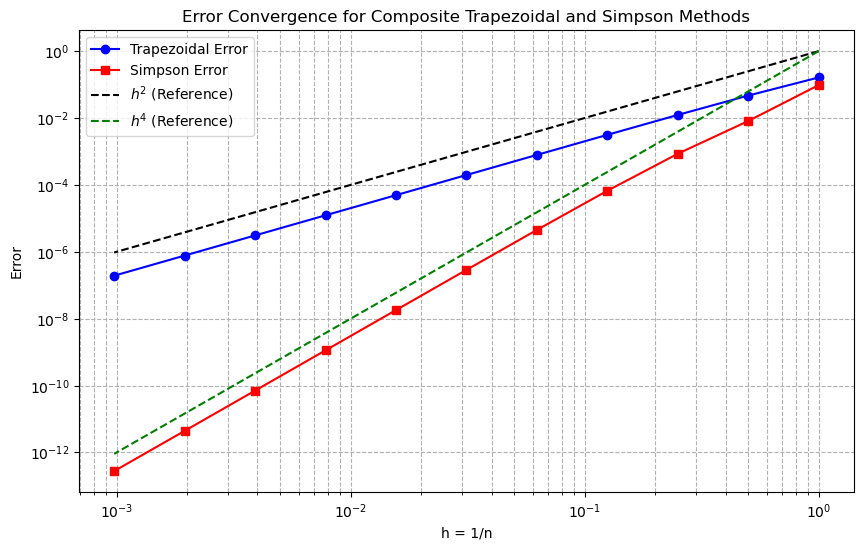

In [7]:
# b

import matplotlib.pyplot as plt

# exact value of the integral of tan(x) from 0 to 1
exact_integral = -np.log(abs(np.cos(1)))+np.log(abs(np.cos(0)))

# set up variables for experiments
k_values = range(11)  # From 0 to 10
n_values = [2**k for k in k_values]
h_values = [1/n for n in n_values]

# initialize error lists
errors_trapezoidal = []
errors_simpson = []

# perform integration and calculate errors
for n in n_values:
    integral_trapezoidal = composite_trapezoidal(np.tan, 0, 1, n)
    integral_simpson = composite_simpson(np.tan, 0, 1, n)
    error_trapezoidal = abs(integral_trapezoidal - exact_integral)
    error_simpson = abs(integral_simpson - exact_integral)
    errors_trapezoidal.append(error_trapezoidal)
    errors_simpson.append(error_simpson)

# plotting
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors_trapezoidal, 'b-o', label='Trapezoidal Error')
plt.loglog(h_values, errors_simpson, 'r-s', label='Simpson Error')
plt.loglog(h_values, [h**2 for h in h_values], 'k--', label=r'$h^2$ (Reference)')
plt.loglog(h_values, [h**4 for h in h_values], 'g--', label=r'$h^4$ (Reference)')
plt.xlabel('h = 1/n')
plt.ylabel('Error')
plt.title('Error Convergence for Composite Trapezoidal and Simpson Methods')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [8]:
# c

import pandas as pd

# calculate the number of function evaluations
evals_trapezoidal = [n + 1 for n in n_values]
evals_simpson = [n + 1 for n in n_values]  # Same as trapezoidal since n is based on 2^k

# Compile the data into a dictionary
data = {
    "h": h_values,
    "error I1,n": errors_trapezoidal,
    "eval I1,n": evals_trapezoidal,
    "error I2,n": errors_simpson,
    "eval I2,n": evals_simpson
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)
df

,h,"error I1,n","eval I1,n","error I2,n","eval I2,n"
0,1.000000,1.630774e-01,2,9.649056e-02,2
1,0.500000,4.687671e-02,3,8.143144e-03,3
2,0.250000,1.235971e-02,5,8.540487e-04,5
3,0.125000,3.140094e-03,9,6.688785e-05,9
4,0.062500,7.884043e-04,17,4.507725e-06,17
5,0.031250,1.973169e-04,33,2.877269e-07,33
6,0.015625,4.934278e-05,65,1.808105e-08,65
7,0.007812,1.233654e-05,129,1.131618e-09,129
8,0.003906,3.084189e-06,257,7.075041e-11,257
9,0.001953,7.710506e-07,513,4.421463e-12,513


In [9]:
# We can observe that the Simpson's rule reaches an error of 10^-6 with significantly fewer evaluations compared to the trapezoidal rule.
# Specifically, Simpson's rule achieves this level of accuracy with 17 function evaluations, while the trapezoidal rule does not reach this level of accuracy within the provided range of n values.
# Therefore, the Simpson's rule is more efficient.

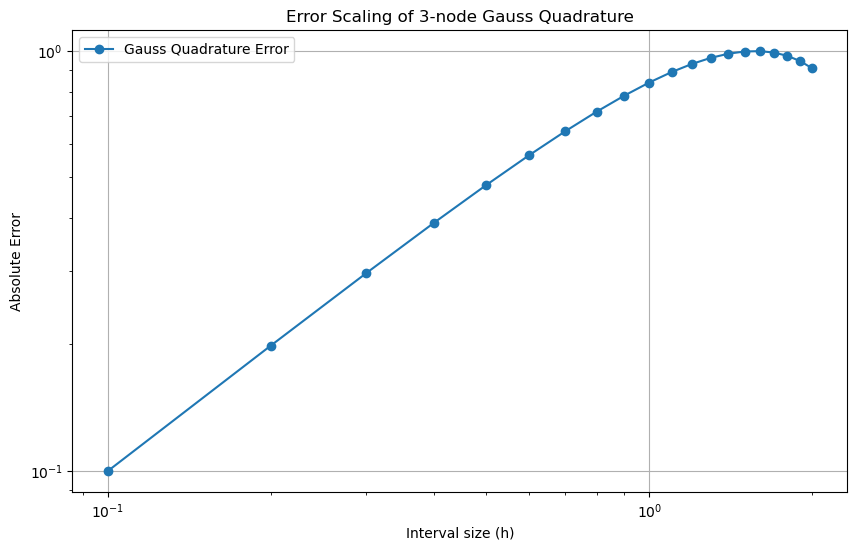

Experimental Order of Convergence (EOC): [0.9927744738763823, 0.9793578394368776, 0.9591038709305214, 0.9318414740785267, 0.8973386969159955, 0.8552932433365972, 0.805322420590856, 0.7469501066002033, 0.6795896434077117, 0.6025213486435229, 0.5148628320456866, 0.41552953000337534, 0.3031817035240117, 0.17615235587125178, 0.03234772474240532, -0.1308924904149175, -0.3169954133691163, -0.5304486224847511, -0.7772420937940248]


In [11]:
# 3.8

# function to be integrated
f = lambda x: np.cos(x)

# nodes and weights for the 3-node Gauss quadrature
weights = [5/9, 8/9, 5/9]
nodes = [-np.sqrt(3/5), 0, np.sqrt(3/5)]

# different interval lengths h
hs = np.linspace(0.1, 2, 20)

# initialize lists to store results
approx_values = []
exact_values = []
errors = []

# perform the integration for each interval length
for h in hs:
    # rescale nodes for the interval [0, h]
    rescaled_nodes = [0.5 * h * (x + 1) for x in nodes]
    # Gauss quadrature approximation
    gauss_approx = h * sum(w * f(x) for w, x in zip(weights, rescaled_nodes))
    approx_values.append(gauss_approx)
    # exact integral using the trapezoidal rule
    exact_val = composite_trapezoidal(f, 0, h,1000)
    exact_values.append(exact_val)
    # error calculation
    errors.append(abs(gauss_approx - exact_val))

# plotting
plt.figure(figsize=(10, 6))
plt.loglog(hs, errors, '-o', label='Gauss Quadrature Error')
plt.title('Error Scaling of 3-node Gauss Quadrature')
plt.xlabel('Interval size (h)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

# Experimental Order of Convergence (EOC)
eocs = [(np.log(errors[i+1]/errors[i]) / np.log(hs[i+1]/hs[i])) for i in range(len(hs)-1)]
eocs

In [12]:
#3.9

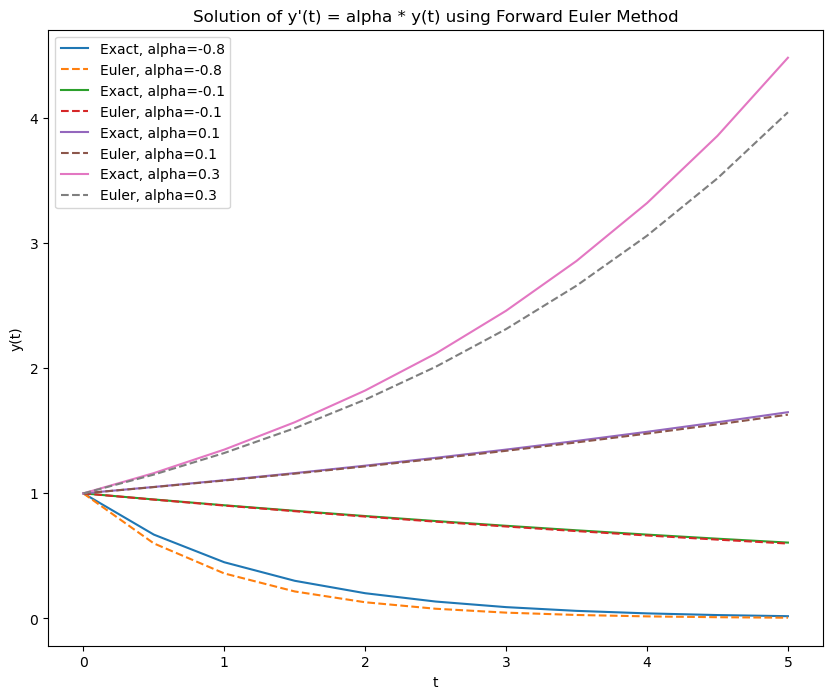

In [13]:
# a

# Constants
t_final = 5
N = 10
h = t_final / N
alphas = [-0.8, -0.1, 0.1, 0.3]
t = np.linspace(0, t_final, N+1)

# Initialize plot
plt.figure(figsize=(10, 8))

for alpha in alphas:
    # exact solution
    y_exact = np.exp(alpha * t)

    # forward Euler method
    u_euler = np.zeros(N+1)
    u_euler[0] = 1  # initial condition
    for n in range(N):
        u_euler[n+1] = u_euler[n] + h * alpha * u_euler[n]

    # plotting
    plt.plot(t, y_exact, label=f'Exact, alpha={alpha}')
    plt.plot(t, u_euler, '--', label=f'Euler, alpha={alpha}')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of y\'(t) = alpha * y(t) using Forward Euler Method')
plt.legend()
plt.show()

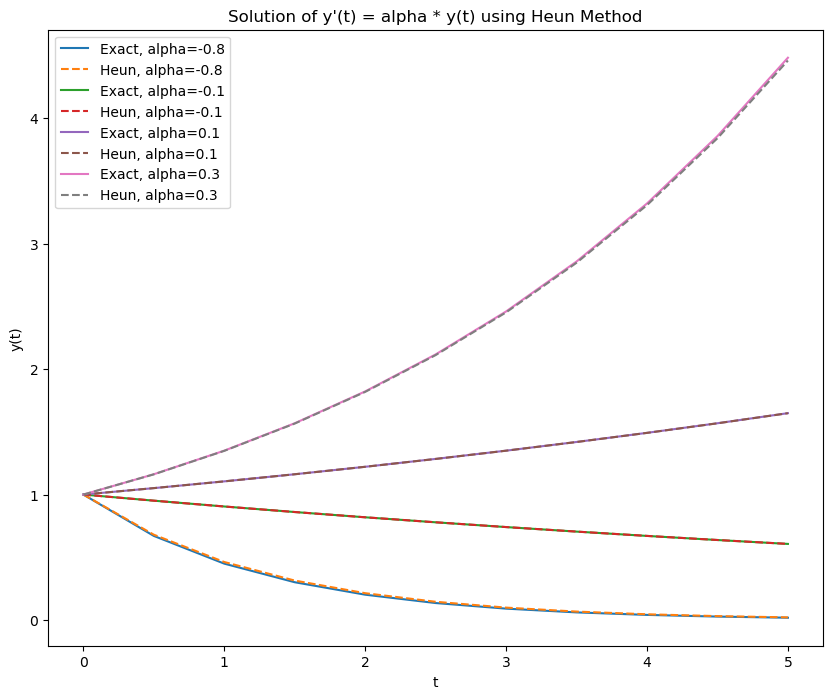

In [14]:
# b


# initialize plot
plt.figure(figsize=(10, 8))

for alpha in alphas:
    # exact solution
    y_exact = np.exp(alpha * t)

    # heun's method
    u_heun = np.zeros(N+1)
    u_heun[0] = 1  # initial condition
    for n in range(N):
        # predictor step
        y_tilde = u_heun[n] + h * alpha * u_heun[n]
        # corrector step
        u_heun[n+1] = u_heun[n] + (h * alpha / 2) * (u_heun[n] + y_tilde)

    # Plotting
    plt.plot(t, y_exact, label=f'Exact, alpha={alpha}')
    plt.plot(t, u_heun, '--', label=f'Heun, alpha={alpha}')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of y\'(t) = alpha * y(t) using Heun Method')
plt.legend()
plt.show()

In [ ]:
# From the graphs, we can observe that:
# For α=-0.8 and α=-0.1, both the Euler and Heun methods produce results close to the exact solution, but the Heun method is closer, indicating better accuracy.
# For α=0.1 and α=0.3, the Heun method still provides a better approximation to the exact solution than the Forward Euler method, particularly as time progresses.
# The Forward Euler method can lead to large error, especially for larger time steps and more significant rates of change.
# In contrast, the Heun method generally provides a more accurate and stable solution.